In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

/Users/austin/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
import re

ray_dir = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT_debugging/'

# Get files, frequencies:
d = os.listdir(ray_dir)


# -- Check which frequencies we have --
freqs_ray  = []
freqs_damp = []

p = re.compile("\d+")
for s in d:
    if s.endswith(".dat"):
        if s.startswith('newray'):
            tmp = p.findall(s)
            freqs_ray.append(int(tmp[0]))

        elif s.startswith('d'):
            tmp = p.findall(s)
            freqs_damp.append(int(tmp[0]))

freqs_ray.sort()
freqs_damp.sort()

# -- confirm we have the same damping and ray files: --
assert freqs_ray == freqs_damp, "mismatch between rayfiles and damping files!"


frequency = freqs_ray[0]
RF = load_rayfile(ray_dir, frequency)




loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/MPItest/newray200.dat


In [112]:
ray_dir = '/Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT_debugging/'

nsteps = []
tg_end = []
lat_list = []

for frequency in freqs_ray[0:3]:
    RF = load_rayfile(ray_dir, frequency)
    lats = sorted(RF.keys())
    lat_list.append(lats)
    nsteps.append([np.shape(RF[l])[0] for l in lats])
    tg_end.append([RF[l]['tg'].tail(1) for l in lats])

print np.shape(nsteps)

loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT_debugging/newray200.dat
loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT_debugging/newray209.dat
loading  /Users/austin/FUSE/shared/users/asousa/WIPP/WIPPv4/rays/RT_debugging/newray218.dat
(3, 160)


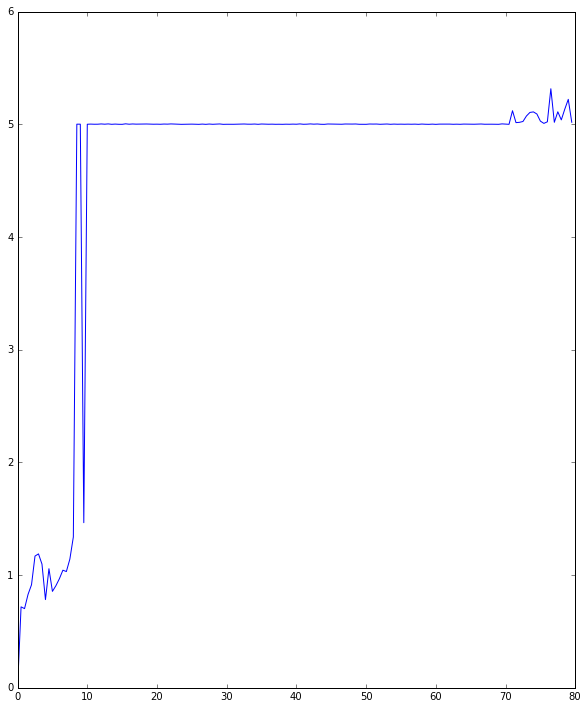

In [113]:
# plt.figure()
plt.plot(lats,tg_end[2])

In [93]:
np.array(tg_end)

array([[array([ 0.]), array([ 0.63196772]), array([ 0.70157057]),
        array([ 0.7656554]), array([ 0.91194195]), array([ 1.158322]),
        array([ 1.0358737]), array([ 0.81801283]), array([ 1.0132772]),
        array([ 0.77103817]), array([ 0.8014791]), array([ 0.84360582]),
        array([ 0.88976556]), array([ 0.94624197]), array([ 0.92339867]),
        array([ 1.0067356]), array([ 1.1068779]), array([ 1.2411815]),
        array([ 5.0007672]), array([ 5.0006351]), array([ 5.0017381]),
        array([ 5.00208]), array([ 5.0001364]), array([ 5.0003409]),
        array([ 0.00647649]), array([ 5.0034523]), array([ 5.0023522]),
        array([ 5.0004272]), array([ 5.0003724]), array([ 5.0004616]),
        array([ 5.001267]), array([ 5.0001369]), array([ 5.0028548]),
        array([ 5.0039854]), array([ 5.0042734]), array([ 5.0024309]),
        array([ 5.0037494]), array([ 5.002388]), array([ 5.0032778]),
        array([ 5.0038061]), array([ 5.0018649]), array([ 5.0005798]),
        